In [22]:
import gym
import torch

from collections import deque
import random

import copy
from torch.autograd import Variable
import numpy as np
import time
import json
import os
from datetime import datetime
import psutil
import os
import numpy as np

In [23]:
# Set random seed for NumPy
np.random.seed(42)

# Set random seed for PyTorch
torch.manual_seed(42)

In [24]:
# Get current process ID
pid = os.getpid()
process = psutil.Process(pid)
env = gym.envs.make("LunarLander-v2")

/home/janak/Documents/Pytorch_CPU/venv/lib/python3.10/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/janak/Documents/Pytorch_CPU/venv/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [25]:
class DQN_C():
    def __init__(self, n_state, n_action, n_hidden=50, lr=0.05):
        self.criterion = torch.nn.MSELoss()
        self.model = torch.nn.Sequential(
                        torch.nn.Linear(n_state, n_hidden),
                        torch.nn.ReLU(),
                        torch.nn.Linear(n_hidden, n_hidden),
                        torch.nn.ReLU(),
                        torch.nn.Linear(n_hidden, n_hidden),
                        torch.nn.ReLU(),
                        torch.nn.Linear(n_hidden, n_action)
                )


        self.model_target = copy.deepcopy(self.model)

        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)

    def update(self, s, y):
        """
        Update the weights of the DQN given a training sample
        @param s: state
        @param y: target value
        """
        s = np.array(s)
        y_pred = self.model(torch.Tensor(s))

        loss = self.criterion(y_pred, Variable(torch.Tensor(np.array(y))))
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()


    def predict(self, s):
        """
        Compute the Q values of the state for all actions using the learning model
        @param s: input state
        @return: Q values of the state for all actions
        """
        with torch.no_grad():
            return self.model(torch.Tensor(np.array(s)))

    def target_predict(self, s):
        """
        Compute the Q values of the state for all actions using the target network
        @param s: input state
        @return: targeted Q values of the state for all actions
        """
        with torch.no_grad():
            return self.model_target(torch.Tensor(np.array(s)))

    def replay(self, memory, replay_size, gamma):
        """
        Experience replay with target network
        @param memory: a list of experience
        @param replay_size: the number of samples we use to update the model each time
        @param gamma: the discount factor
        """
        if len(memory) >= replay_size:
            replay_data = random.sample(memory, replay_size)

            states = []
            td_targets = []
            for state, action, next_state, reward, is_done in replay_data:
                states.append(state)
                q_values = self.predict(state).tolist()
                if is_done:
                    q_values[action] = reward
                else:
                    q_values_next = self.target_predict(next_state).detach()

                    q_values[action] = reward + gamma * torch.max(q_values_next).item()

                td_targets.append(q_values)

            self.update(states, td_targets)

    def copy_target(self):
        self.model_target.load_state_dict(self.model.state_dict())

    def name(self):
      return "Model C"



In [26]:
def gen_epsilon_greedy_policy(estimator, epsilon, n_action):
    def policy_function(state):
        if random.random() < epsilon:
            return random.randint(0, n_action - 1)
        else:
            q_values = estimator.predict(state)
            return torch.argmax(q_values).item()
    return policy_function

In [27]:

n_episode = 600
replay_size = 50
n_state = env.observation_space.shape[0]
n_action = env.action_space.n
n_hidden = 75


In [28]:
import random

In [29]:
def generate_hyperparameters(n_state,n_action,n_hidden):
  # target_update = random.randint(5,10)
  target_update = 10
  # replay_size = random.randint(50,200)
  replay_size = 200
  # lr = random.uniform(0.001, 0.1)
  lr = 0.001
  epsilon = 0.1
  # gamma = random.uniform(1.0)
  gamma = 1.0
#   dqn_a = DQN_A(n_state,n_action,n_hidden,lr)
#   dqn_b = DQN_B(n_state,n_action,n_hidden,lr)
  dqn_c = DQN_C(n_state,n_action,n_hidden,lr)
#   dqn_d = DQN_D(n_state,n_action,n_hidden,lr)
  dqn = random.choice([dqn_c])
  # dqn = dqn_b

  return target_update,replay_size,epsilon,gamma,dqn,lr



In [30]:
memory = deque(maxlen=10000)

In [31]:
epsilon_decay = 0.99

In [32]:

path = "/home/janak/Documents/Pytorch_CPU/Lunar_Plots/"

/home/janak/Documents/Pytorch_CPU/venv/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 0 Reward: -194.377709330878
Episode: 1 Reward: -171.97668539285033
Episode: 2 Reward: -568.2807166563753
Episode: 3 Reward: -272.21203900180956
Episode: 4 Reward: -502.62543102388724
Episode: 5 Reward: -212.4289587826418
Episode: 6 Reward: -520.787100798109
Episode: 7 Reward: -664.63729955485
Episode: 8 Reward: -123.56999001480432
Episode: 9 Reward: -206.4228163545721
Episode: 10 Reward: -260.562545843917
Episode: 11 Reward: -185.20983984798764
Episode: 12 Reward: -45.20637148513336
Episode: 13 Reward: -447.5141425074708
Episode: 14 Reward: -314.1046453261141
Episode: 15 Reward: -299.9606023148508
Episode: 16 Reward: -191.34048584172487
Episode: 17 Reward: -181.95665898788636
Episode: 18 Reward: -159.05268911545636
Episode: 19 Reward: -141.60679624998633
Episode: 20 Reward: -238.19871293787793
Episode: 21 Reward: -276.3316592131804
Episode: 22 Reward: -162.2878102258311
Episode: 23 Reward: -108.28464999731274
Episode: 24 Reward: -113.94794381855596
Episode: 25 Reward: -290.981

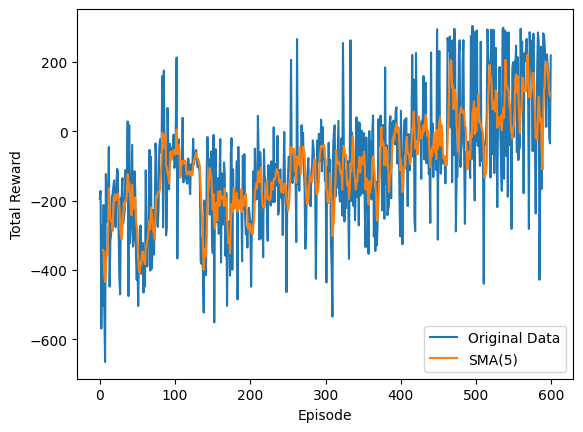

In [33]:
for i in range(1):
  target_update,replay_size,epsilon,gamma,dqn,lr = generate_hyperparameters(n_state,n_action,n_hidden)

  total_reward_episode = [0] * n_episode
  for episode in range(n_episode):
      # print(f"Episode: {episode}")
      if episode % target_update == 0:
          dqn.copy_target()
      policy = gen_epsilon_greedy_policy(dqn,epsilon,n_action)
      state = env.reset()
      is_done = False

      while not is_done:
          # print(f"State: {state}")
          action = policy(state)
          next_state,reward,is_done,_ = env.step(action)
          total_reward_episode[episode] += reward
          memory.append((state,action,next_state,reward,is_done))

          if is_done:
              break

          dqn.replay(memory,replay_size,gamma)
          state = next_state
      print(f"Episode: {episode} Reward: {total_reward_episode[episode]}")
      epsilon = max(epsilon*epsilon_decay,0.01)

  # Get the current date and time
  current_datetime = str(datetime.now())

  data = {"Time":current_datetime,
          "Data":{"Model":dqn.name(),
                  "n_hidden":n_hidden,
                          "Target Update: ":target_update,
                          "Replay _size: ":replay_size,
                          "Learning rate: ":lr,
                          "Epsilon: ":epsilon,
                          "Gamma: ":gamma,
                          "Avg Reward":sum(total_reward_episode)/len(total_reward_episode)}
                          }
  # Define the file path for your JSON file
  file_path = path+'data.json'

  # Check if the JSON file exists
  if os.path.exists(file_path):
      # Open the existing JSON file for appending
      with open(file_path, 'a') as file:
          # Append the dictionary as a new line in the file
          file.write('\n')
          json.dump(data, file, indent=4)
  else:
      # Create a new JSON file and write the dictionary to it
      with open(file_path, 'w') as file:
          json.dump(data, file, indent=4)

  print("Data appended to or written to JSON file successfully.")


  print(f"Average reward: {sum(total_reward_episode)/len(total_reward_episode)}")



  import matplotlib.pyplot as plt
  # plt.plot(total_reward_episode)
  # plt.show()


  # Assuming total_reward_episode is your list of rewards with length 1000
  # Generate SMA(5) using numpy
  sma_5 = np.convolve(total_reward_episode, np.ones(5)/5, mode='valid')

  # Plot the original data
  plt.plot(total_reward_episode, label='Original Data')

  # Plot SMA(5)
  plt.plot(np.arange(4,n_episode), sma_5, label='SMA(5)')

  # Add labels and legend
  plt.xlabel('Episode')
  plt.ylabel('Total Reward')
  plt.legend()
  # Save the plot
  # path = "/content/drive/MyDrive/Colab Notebooks/Python_Course/PyTorch_Course/rl/"
  figname = path+current_datetime+'.png'
  plt.savefig(figname)
  # plt.show()

In [34]:
model_path = path+current_datetime+".pth"

In [35]:
torch.save(dqn.model.state_dict(), model_path)